## Importing libraries and opening dataframes

In [2]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
%matplotlib inline

In [3]:
powerplants = pd.read_csv('powerplants.csv')

In [4]:
powerplants.head()

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,...,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,...,0.0,0.0,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,...,0.0,0.0,NaN,NaN,"Coal = 1088.5 MW, Natural Gas = 1072 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,31.006900,-88.010300
2,4,Walter Bouldin Dam,Alabama Power Co,195,Electric Utility,Wetumpka,Elmore,36092,750 Bouldin Dam Road,hydroelectric,...,0.0,0.0,NaN,NaN,Hydroelectric = 225.9 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,32.583889,-86.283056
3,7,Gadsden,Alabama Power Co,195,Electric Utility,Gadsden,Etowah,35903,1000 Goodyear Ave,natural gas,...,0.0,0.0,NaN,NaN,Natural Gas = 130 MW,Natural Gas Steam Turbine,"EIA-860, EIA-860M and EIA-923",201607,34.012800,-85.970800
4,8,Gorgas,Alabama Power Co,195,Electric Utility,Parrish,Walker,35580,460 Gorgas Road,coal,...,0.0,0.0,NaN,NaN,Coal = 1034 MW,Conventional Steam Coal,"EIA-860, EIA-860M and EIA-923",201607,33.644344,-87.196486


In [5]:
powerplants.shape

(7610, 28)

In [6]:
powerplants.dtypes

Plant_Code      int64
Plant_Name     object
Utility_Na     object
Utility_ID      int64
sector_nam     object
City           object
County         object
Zip             int64
Street_Add     object
PrimSource     object
Total_MW      float64
Coal_MW       float64
NG_MW         float64
Crude_MW      float64
Bio_MW        float64
Hydro_MW      float64
HydroPS_MW    float64
Nuclear_MW    float64
Solar_MW      float64
Wind_MW       float64
Geo_MW        float64
Other_MW      float64
source_des     object
tech_desc      object
Source         object
Period          int64
Latitude      float64
Longitude     float64
dtype: object

In [7]:
states = gpd.read_file("/Users/sotiris_sideris/Desktop/FOUNDATIONS/CLASS_013/homework/13-homework/cb_2016_us_state_500k/cb_2016_us_state_500k.shp")
states.head()

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999..."
1,0400000US02,1477946266785,245390495931,02,00,Alaska,02,01785533,AK,"(POLYGON ((-134.737262 58.261354, -134.73441 5..."
2,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3..."
3,0400000US05,134771517596,2960191698,05,00,Arkansas,05,00068085,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ..."
4,0400000US06,403501101370,20466718403,06,00,California,06,01779778,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ..."


In [8]:
def make_point(row):
    return Point(row.Longitude, row.Latitude)

points = powerplants.apply(make_point, axis=1)
powerplants = gpd.GeoDataFrame(powerplants, geometry=points)
powerplants.crs = {'init': 'epsg:4326'}
powerplants.head(2)

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,...,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,...,0.0,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823,POINT (-87.35682299999999 33.458665)
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,...,0.0,NaN,NaN,"Coal = 1088.5 MW, Natural Gas = 1072 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,31.006900,-88.010300,POINT (-88.0103 31.0069)


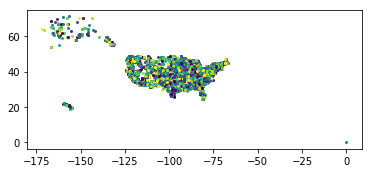

In [9]:
powerplants.plot()

In [10]:
states.to_crs({'init': 'epsg:4326'}).intersects(powerplants).head()

0     True
1    False
2    False
3    False
4    False
dtype: bool

## 1. Make a map of power plants in the US, color coded by type

(-197.09527795, 197.72483894999999, -18.84439205, 75.660855049999995)

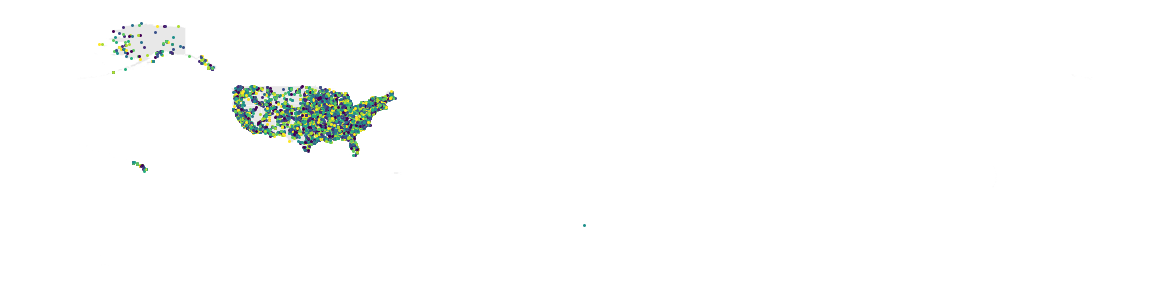

In [11]:
ax = states.plot(figsize=(20,20), color='lightgrey', linewidth=0.25, edgecolor='white')
powerplants.plot(markeredgewidth=0, markersize=3, ax=ax)
ax.axis('off')

## 2. Make a map of air quality stations, color coded by average air quality

In [12]:
air_quality_stations = pd.read_csv('pm25_annual_fixed.csv')
air_quality_stations.head(2)

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,75th Percentile,50th Percentile,10th Percentile,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,8.0,5.7,3.8,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2017-05-18
1,1,27,1,88101,1,33.284928,-85.803608,NAD83,PM2.5 - Local Conditions,24 HOUR,...,12.4,8.7,2.9,ASHLAND,ASHLAND AIRPORT,Alabama,Clay,Ashland,NaN,2017-05-18


In [13]:
air_quality_stations.shape

(441, 55)

In [14]:
air_quality_stations.dtypes

State Code                         int64
County Code                        int64
Site Num                           int64
Parameter Code                     int64
POC                                int64
Latitude                         float64
Longitude                        float64
Datum                             object
Parameter Name                    object
Sample Duration                   object
Pollutant Standard                object
Metric Used                       object
Method Name                       object
Year                               int64
Units of Measure                  object
Event Type                        object
Observation Count                  int64
Observation Percent                int64
Completeness Indicator            object
Valid Day Count                    int64
Required Day Count                 int64
Exceptional Data Count             int64
Null Data Count                    int64
Primary Exceedance Count         float64
Secondary Exceed

In [15]:
def make_point(row):
    return Point(row.Longitude, row.Latitude)

points = air_quality_stations.apply(make_point, axis=1)
air_quality_stations = gpd.GeoDataFrame(air_quality_stations, geometry=points)
air_quality_stations.crs = {'init': 'epsg:4326'}
air_quality_stations.head(2)

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,50th Percentile,10th Percentile,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change,geometry
0,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,5.7,3.8,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2017-05-18,POINT (-87.880258 30.497478)
1,1,27,1,88101,1,33.284928,-85.803608,NAD83,PM2.5 - Local Conditions,24 HOUR,...,8.7,2.9,ASHLAND,ASHLAND AIRPORT,Alabama,Clay,Ashland,NaN,2017-05-18,POINT (-85.803608 33.284928)


In [16]:
states = states.to_crs(air_quality_stations.crs)
states.head(2)

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999..."
1,0400000US02,1477946266785,245390495931,02,00,Alaska,02,01785533,AK,"(POLYGON ((-134.737262 58.261354, -134.73441 5..."


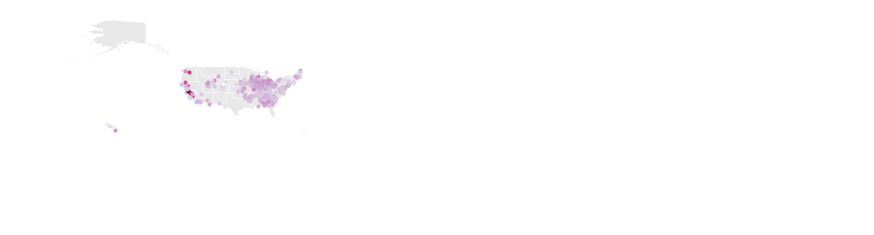

In [17]:
ax = states.plot(figsize=(15,15), color='lightgrey', linewidth=0.25, edgecolor='white')
ax.axis('off')
air_quality_stations.plot(column= 'Arithmetic Mean', cmap='PuRd', markersize=3, ax=ax)

## 3. Make a map of air quality stations, color coded by worst air quality ever 


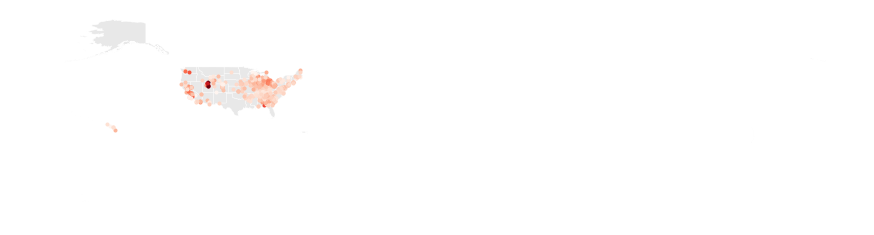

In [18]:
ax = states.plot(figsize=(15,15), color='lightgrey', linewidth=0.25, edgecolor='white')
ax.axis('off')
air_quality_stations.plot(column= '1st Max Value', cmap='Reds', markersize=3, ax=ax)

## 5. Map all of the nuclear power plants in red, with the rest of the plants as dark grey.

In [20]:
nuc = powerplants[(powerplants.PrimSource == 'nuclear')]

In [21]:
non_nuc = powerplants[~(powerplants.PrimSource == 'nuclear')]

(-197.09527795, 197.72483894999999, -18.844392050000003, 75.660855050000009)

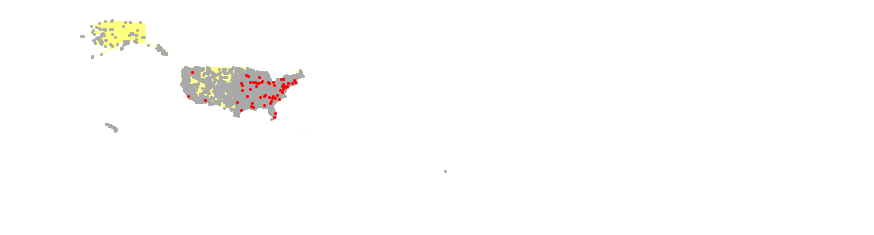

In [24]:
ax = states.plot(figsize=(15,15), color='yellow', linewidth=0.25, edgecolor='white')
non_nuc.plot(color='darkgrey', ax=ax, markeredgewidth=0, markersize=3)
nuc.plot(color='red', ax=ax, markeredgewidth=0, markersize=3)
ax.axis('off')